# Artificial Intelligence

#### Lecturer: Tai Le Quy
#### 24.04.2023

In this tutorial we will cover some basics of Python, Pandas as well as an example of classification model on the Iris dataset.

The Python and Numpy part of this tutorial is based on the jupyter notebook version of the CS231n Python + Numpy Tutorial created by Justin Johnson, which can be found [here](https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb).

## 1. Introduction to Python

Python is a high-level, dynamically typed multiparadigm programming language. Python code is often said to be almost like pseudocode, since it allows you to express very powerful ideas in very few lines of code while being very readable. As an example, here is an implementation of the classic quicksort algorithm in Python:

In [1]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print(quicksort([3,6,8,10,1,2,1]))

[1, 1, 2, 3, 6, 8, 10]


### 1.1 Installing Python, Jupyter using Anaconda and conda
Anaconda conveniently installs Python, the Jupyter Notebook, and other commonly used packages for scientific computing and data science.

Use the following installation steps:

- Download Anaconda (https://www.anaconda.com/download)

- Install the version of Anaconda which you downloaded, following the instructions on the download page.

- Congratulations, you have installed Jupyter Notebook. To run the notebook: use the command: <b>jupyter notebook</b> or from <b>Anaconda Navigator</b>

### 1.2 Python versions
There are currently two different supported versions of Python, 2 and 3. 
Somewhat confusingly, Python 3 introduced many backwards-incompatible changes to the language, so code written for e.g. 2.7 may not work under 3.6 and vice versa. For this class all code will use Python >= 3.6.

You can check your Python version at the command line by running `python --version`.
The latest version of Python (Python 3.11.3) is available on the home page: https://www.python.org/

### 1.3 Basic data types
Like most languages, Python has a number of basic types including integers, floats, booleans, and strings. These data types behave in ways that are familiar from other programming languages.

**Numbers**: Integers and floats work as you would expect from other languages:

In [2]:
x = 3
print(type(x)) # Prints "<class 'int'>"
print(x)       # Prints "3"
print(x + 1)   # Addition; prints "4"
print(x - 1)   # Subtraction; prints "2"
print(x * 2)   # Multiplication; prints "6"
print(x ** 2)  # Exponentiation; prints "9"
x += 1
print(x)  # Prints "4"
x *= 2
print(x)  # Prints "8"
y = 2.5
print(type(y)) # Prints "<class 'float'>"
print(y, y + 1, y * 2, y ** 2) # Prints "2.5 3.5 5.0 6.25"

<class 'int'>
3
4
2
6
9
4
8
<class 'float'>
2.5 3.5 5.0 6.25


Note that unlike many languages, Python does not have unary increment (x++) or decrement (x--) operators.

Python also has built-in types for long integers and complex numbers; you can find all of the details in the [documentation](https://docs.python.org/3.7/library/stdtypes.html#numeric-types-int-float-complex).

**Booleans**: Python implements all of the usual operators for Boolean logic, but uses English words rather than symbols (`&&`, `||`, etc.):

In [3]:
t = True
f = False
print(type(t)) # Prints "<class 'bool'>"
print(t and f) # Logical AND; prints "False"
print(t or f)  # Logical OR; prints "True"
print(not t)   # Logical NOT; prints "False"
print(t != f)  # Logical XOR; prints "True"

<class 'bool'>
False
True
False
True


**Strings**: Python has great support for strings:

In [4]:
hello = 'hello'    # String literals can use single quotes
world = "world"    # or double quotes; it does not matter.
print(hello)       # Prints "hello"
print(len(hello))  # String length; prints "5"
hw = hello + ' ' + world  # String concatenation
print(hw)  # prints "hello world"
hw12 = '%s %s %d' % (hello, world, 12)  # sprintf style string formatting
print(hw12)  # prints "hello world 12"
hw12 = f'{hello} {world} {12}' # f-strings, a new and improved way of formatting strings, available in python >= 3.6
print(hw12)

hello
5
hello world
hello world 12
hello world 12


String objects have a bunch of useful methods; for example:

In [5]:
s = "hello"
print(s.capitalize())  # Capitalize a string; prints "Hello"
print(s.upper())       # Convert a string to uppercase; prints "HELLO"
print(s.rjust(7))      # Right-justify a string, padding with spaces; prints "  hello"
print(s.center(7))     # Center a string, padding with spaces; prints " hello "
print(s.replace('l', '(ell)'))  # Replace all instances of one substring with another;
                                # prints "he(ell)(ell)o"
print('  world '.strip())  # Strip leading and trailing whitespace; prints "world"

Hello
HELLO
  hello
 hello 
he(ell)(ell)o
world


You can find a list of all string methods in the [documentation](https://docs.python.org/3.7/library/stdtypes.html#string-methods).

### 1.4 Container types
Python includes several built-in container types: lists, dictionaries, sets, and tuples.

#### Lists
A list is the Python equivalent of an array, but is resizeable and can contain elements of different types:

In [6]:
xs = [3, 1, 2]    # Create a list
print(xs, xs[2])  # Prints "[3, 1, 2] 2"
print(xs[-1])     # Negative indices count from the end of the list; prints "2"
xs[2] = 'foo'     # Lists can contain elements of different types
print(xs)         # Prints "[3, 1, 'foo']"
xs.append('bar')  # Add a new element to the end of the list
print(xs)         # Prints "[3, 1, 'foo', 'bar']"
x = xs.pop()      # Remove and return the last element of the list
print(x, xs)      # Prints "bar [3, 1, 'foo']"

[3, 1, 2] 2
2
[3, 1, 'foo']
[3, 1, 'foo', 'bar']
bar [3, 1, 'foo']


As usual, you can find all the gory details about lists in the [documentation](https://docs.python.org/3.7/tutorial/datastructures.html#more-on-lists).

**Slicing**: In addition to accessing list elements one at a time, Python provides concise syntax to access sublists; this is known as slicing:

In [7]:
nums = list(range(5))     # range is a built-in function that creates a list of integers
print(nums)               # Prints "[0, 1, 2, 3, 4]"
print(nums[2:4])          # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print(nums[2:])           # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print(nums[:2])           # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print(nums[:])            # Get a slice of the whole list; prints "[0, 1, 2, 3, 4]"
print(nums[:-1])          # Slice indices can be negative; prints "[0, 1, 2, 3]"
nums[2:4] = [8, 9]        # Assign a new sublist to a slice
print(nums)               # Prints "[0, 1, 8, 9, 4]"

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


We will see slicing again in the context of numpy arrays.

**Loops**: You can loop over the elements of a list like this:

In [8]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)
# Prints "cat", "dog", "monkey", each on its own line.

cat
dog
monkey


If you want access to the index of each element within the body of a loop, use the built-in `enumerate` function:

In [9]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print(f'#{idx +1}: {animal}')
# Prints "#1: cat", "#2: dog", "#3: monkey", each on its own line

#1: cat
#2: dog
#3: monkey


**List comprehensions**: When programming, frequently we want to transform one type of data into another. As a simple example, consider the following code that computes square numbers:

In [10]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print(squares)   # Prints [0, 1, 4, 9, 16]

[0, 1, 4, 9, 16]


You can make this code simpler using a **list comprehension**:

In [11]:
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
print(squares)   # Prints [0, 1, 4, 9, 16]

[0, 1, 4, 9, 16]


List comprehensions can also contain conditions:

In [12]:
nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 for x in nums if x % 2 == 0]
print(even_squares)  # Prints "[0, 4, 16]"

[0, 4, 16]


#### Dictionaries
A dictionary stores (key, value) pairs, similar to a `Map` in Java or an object in Javascript. You can use it like this:

In [13]:
d = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data
print(d['cat'])       # Get an entry from a dictionary; prints "cute"
print('cat' in d)     # Check if a dictionary has a given key; prints "True"
d['fish'] = 'wet'     # Set an entry in a dictionary
print(d['fish'])      # Prints "wet"
# print(d['monkey'])  # KeyError: 'monkey' not a key of d
print(d.get('monkey', 'N/A'))  # Get an element with a default; prints "N/A"
print(d.get('fish', 'N/A'))    # Get an element with a default; prints "wet"
del d['fish']         # Remove an element from a dictionary
print(d.get('fish', 'N/A')) # "fish" is no longer a key; prints "N/A"

cute
True
wet
N/A
wet
N/A


You can find all you need to know about dictionaries in the [documentation](https://docs.python.org/3.7/library/stdtypes.html#dict).

**Loops**: It is easy to iterate over the keys in a dictionary:

In [14]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal in d:
    legs = d[animal]
    print(f'A {animal} has {legs} legs')
# Prints "A person has 2 legs", "A cat has 4 legs", "A spider has 8 legs"

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


If you want access to keys and their corresponding values, use the items method:

In [15]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, legs in d.items():
    print(f'A {animal} has {legs} legs')
# Prints "A person has 2 legs", "A cat has 4 legs", "A spider has 8 legs"

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


**Dictionary comprehensions**: These are similar to list comprehensions, but allow you to easily construct dictionaries. For example:

In [16]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print(even_num_to_square)  # Prints "{0: 0, 2: 4, 4: 16}"

{0: 0, 2: 4, 4: 16}


#### Sets
A set is an unordered collection of distinct elements. As a simple example, consider the following:

In [17]:
animals = {'cat', 'dog'}
print('cat' in animals)   # Check if an element is in a set; prints "True"
print('fish' in animals)  # prints "False"
animals.add('fish')       # Add an element to a set
print('fish' in animals)  # Prints "True"
print(len(animals))       # Number of elements in a set; prints "3"
animals.add('cat')        # Adding an element that is already in the set does nothing
print(len(animals))       # Prints "3"
animals.remove('cat')     # Remove an element from a set
print(len(animals))       # Prints "2"

True
False
True
3
3
2


As usual, everything you want to know about sets can be found in the [documentation](https://docs.python.org/3.7/library/stdtypes.html#set).

**Loops**: Iterating over a set has the same syntax as iterating over a list; however since sets are unordered, you cannot make assumptions about the order in which you visit the elements of the set:

In [18]:
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print(f'#{idx +1}: {animal}')
# Prints items in some undefined order

#1: dog
#2: fish
#3: cat


**Set comprehensions**: Like lists and dictionaries, we can easily construct sets using set comprehensions:

In [19]:
from math import sqrt
nums = {int(sqrt(x)) for x in range(30)}
print(nums)  # Prints "{0, 1, 2, 3, 4, 5}"

{0, 1, 2, 3, 4, 5}


#### Tuples
A tuple is an (immutable) ordered list of values. A tuple is in many ways similar to a list; one of the most important differences is that tuples can be used as keys in dictionaries and as elements of sets, while lists cannot. Here is a trivial example:

In [20]:
d = {(x, x + 1): x for x in range(10)}  # Create a dictionary with tuple keys
t = (5, 6)        # Create a tuple
print(type(t))    # Prints "<class 'tuple'>"
print(d[t])       # Prints "5"
print(d[(1, 2)])  # Prints "1"

<class 'tuple'>
5
1


The [documentation](https://docs.python.org/3.7/tutorial/datastructures.html#tuples-and-sequences) has more information about tuples.

### 1.5 Functions
Python functions are defined using the `def` keyword. For example:

In [21]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))
# Prints "negative", "zero", "positive"

negative
zero
positive


We will often define functions to take optional keyword arguments, like this:

In [22]:
def hello(name, loud=False):
    if loud:
        print(f'HELLO, {name.upper()}!')
    else:
        print(f'Hello, {name}')

hello('Bob') # Prints "Hello, Bob"
hello('Fred', loud=True)  # Prints "HELLO, FRED!"

Hello, Bob
HELLO, FRED!


There is a lot more information about Python functions in the [documentation](https://docs.python.org/3.7/tutorial/controlflow.html#defining-functions).

### 1.6 Classes
The syntax for defining classes in Python is straightforward:

In [23]:
class Greeter:

    # Constructor
    def __init__(self, name):
        self.name = name  # Create an instance variable

    # Instance method
    def greet(self, loud=False):
        if loud:
            print(f'HELLO, {self.name.upper()}!')
        else:
            print(f'Hello, {self.name}')

g = Greeter('Fred')  # Construct an instance of the Greeter class
g.greet()            # Call an instance method; prints "Hello, Fred"
g.greet(loud=True)   # Call an instance method; prints "HELLO, FRED!"

Hello, Fred
HELLO, FRED!


You can read a lot more about Python classes in the [documentation](https://docs.python.org/3.7/tutorial/classes.html).

## 2. Apply an AI model (classification) on dataset

### 2.1 Introduction to Pandas
The pandas library provides high-performance, easy-to-use data structures and data analysis tools. The main data structure is the DataFrame, which you can think of as an in-memory 2D table (like a spreadsheet, with column names and row labels). Many features available in Excel are available programmatically, such as creating pivot tables, computing columns based on other columns, plotting graphs, etc. You can also group rows by column value, or join tables much like in SQL. Pandas is also great at handling time series.

The two useful data structures we will mainly use are:
* [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series) objects. A Series object is a 1D array, similar to a column in a spreadsheet (with a column name and row labels).
* [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) objects. This is a 2D table, similar to a spreadsheet (with column names and row labels).

A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:
* Dict of 1D arrays, lists, dicts or Series
* 2D numpy arrays
* Series
* Another DataFrame
* ...

Along with the data, you can optionally pass **index** (row labels) and **columns** (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

Pandas includes many functions to read a DataFrame from a variety of data formats:
* `pd.read_csv`
* `pd.read_json`
* `pd.read_sql`
* ...

See [Pandas I/O documentation](https://pandas.pydata.org/pandas-docs/stable/reference/io.html) for more.

### 2.2 Read dataset with Pandas
For now, we will use pandas to inspect our first dataset, the famous [Iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris).

In [1]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class-label']
classnames = ['Iris-setosa','Iris-versicolor', 'Iris-virginica']
dataset = pd.read_csv(url, names=names)
dataset.sample(5) # prints a ten random samples

,sepal-length,sepal-width,petal-length,petal-width,class-label
139,6.9,3.1,5.4,2.1,Iris-virginica
6,4.6,3.4,1.4,0.3,Iris-setosa
98,5.1,2.5,3.0,1.1,Iris-versicolor
107,7.3,2.9,6.3,1.8,Iris-virginica
100,6.3,3.3,6.0,2.5,Iris-virginica


`pandas` makes it easy to get an overview of the dataset and its statistics:

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class-label   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can also filter the dataset based on features or instances quite easily:

In [5]:
dataset['sepal-length'] # selects the 'sepal-length' feature column

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal-length, Length: 150, dtype: float64

In [6]:
dataset['class-label'] # selects the class-labels

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class-label, Length: 150, dtype: object

In [7]:
dataset[dataset['class-label'] == 'Iris-setosa'] # filters the dataset based on a specific class label

,sepal-length,sepal-width,petal-length,petal-width,class-label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### 2.3 Apply decision tree classification model on Iris data set

In [8]:
# Dividing data into features and labels
X = dataset.iloc[:, 0:4].values
Y = dataset.iloc[:, 4].values

<b>Label encoding </b>
<br>
As we can see labels are categorical. KNeighborsClassifier does not accept string labels. We need to use LabelEncoder to transform them into numbers. Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.
</br>

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

<b>Spliting dataset into training set and test set </b>
<br>
Let's split dataset into training set and test set, to check later on whether or not our classifier works correctly.
We split 60% data for training and 40% for testing

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 0)

Lastly, because features values are in the same order of magnitude, there is no need for feature scaling. Nevertheless in other sercostamses it is extremly important to apply feature scaling before running classification algorithms.

<b>Making predictions</b>

In [11]:
# Fitting clasifier to the Training set
# Loading libraries
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Call decision tree
clf = tree.DecisionTreeClassifier(random_state=0)

# Fitting the model
clf.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = clf.predict(X_test)

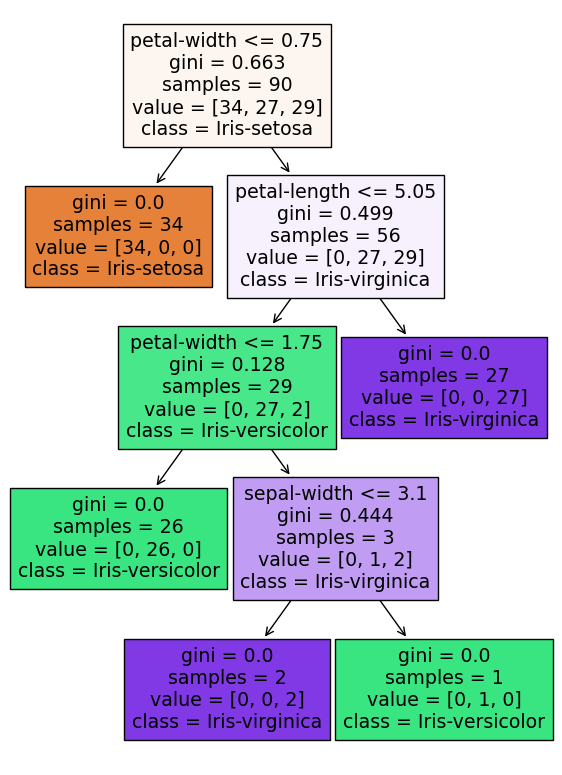

In [12]:
#Plot the decision tree
import matplotlib.pyplot as plt #Library for plot
plt.figure(figsize = (7,10), dpi = 100)
tree.plot_tree(clf,filled=True,feature_names = names,class_names=classnames)
plt.savefig("Iris-decision-tree.pdf",bbox_inches='tight')
plt.show()

<b>Evaluating predictions </b>

In [13]:
# Confusion Matrix
print("Confusion Matrix")
print(confusion_matrix(Y_test, Y_pred))

Confusion Matrix
[[16  0  0]
 [ 0 22  1]
 [ 0  2 19]]


In [14]:
#Accuracy
print("Accuracy")
print(accuracy_score(Y_test, Y_pred))

Accuracy
0.95


In [17]:
#Summary
print("Summary")
print(classification_report(Y_test, Y_pred))

Summary
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.92      0.96      0.94        23
           2       0.95      0.90      0.93        21

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



## 3. Homework

- Apply the decision tree classification with a similar process to forcast whether a customer is 'good' or 'bad' in the German credit dataset: https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data). 
- Report the results on accuracy, precision, recall and F-score measures.